<a href="https://colab.research.google.com/github/xXxRosxXx/261361_se_project_ok/blob/master/MNIST_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample Tutorial on building a CNN to classify MNIST dataset
Credits:
https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d


In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


8


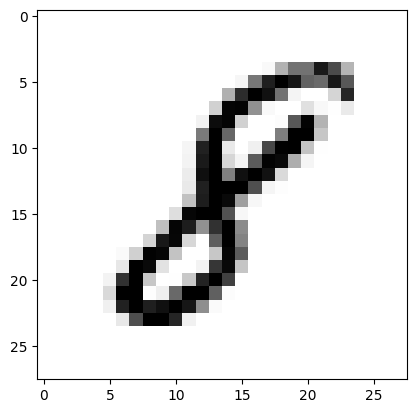

In [2]:
import matplotlib.pyplot as plt
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4732)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         605,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 607,394 (2.32 MB)

 Trainable params: 607,394 (2.32 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train,batch_size=1, epochs=20)

Epoch 1/20
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 261s 4ms/step - accuracy: 0.9032 - loss: 0.3180
Epoch 2/20
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 237s 4ms/step - accuracy: 0.9614 - loss: 0.1572
Epoch 3/20
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 267s 4ms/step - accuracy: 0.9667 - loss: 0.1548
Epoch 4/20
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 275s 4ms/step - accuracy: 0.9697 - loss: 0.1517
Epoch 5/20
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 262s 4ms/step - accuracy: 0.9753 - loss: 0.1381
Epoch 6/20
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 258s 4ms/step - accuracy: 0.9730 - loss: 0.1653
Epoch 7/20
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 249s 4ms/step - accuracy: 0.9766 - loss: 0.1547
Epoch 8/20
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 243s 4ms/step - accuracy: 0.9782 - loss: 0.1513
Epoch 9/20
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 262s 4ms/step - accuracy: 0.9784 - loss: 0.1640
Epoch 10/20
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 267s 4ms/step - accuracy: 0.9799 - loss: 0.1714
Epoch 11/20
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 257s 4ms/step - accuracy: 0.9811 -

In [9]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9728 - loss: 0.8393


[0.7057833671569824, 0.977400004863739]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
0


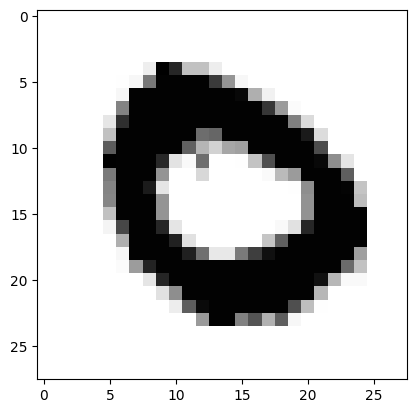

In [15]:
image_index = 5965
img_rows = 28
img_cols = 28
plt.imshow(x_test[image_index].reshape(img_rows, img_cols),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, img_rows, img_cols, 1))
print(pred.argmax())